<a href="https://colab.research.google.com/github/elinteerie/Nigeria-Food-AI/blob/main/Nigeria_Food_AI_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Nigeria Food AI


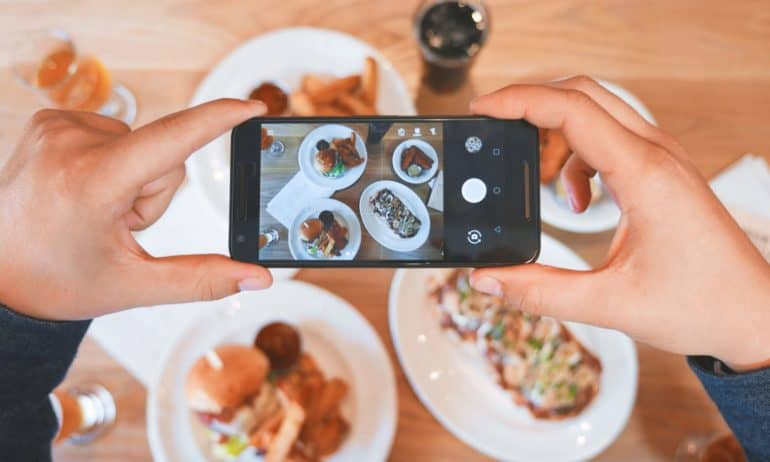

Artificial Intelligence and Deep Learning Solutions for Nigeria/Africa Food Recognition

We automate, optimize and provide an added value to processes related to food and nutrition.

Upload a picture and receive all detailed nutrients

Features//
Version 1: Dish names
Second Release: Food groups
Third Release: Micro and Macro Nutrients
Fourth Release: Ingredients
Fifth Release: Food Group
Sixth: & lots more

This Nigeria Indigenous AI will be trained on the following food:

For the First Version and testing

* Akara and Bread
* Banga Soup
* Bitterleaf Soup
* Edikakong
* Egusi
* Ewedu
* Garri and Groundnut 
* Jellof
* Moi-moi
* Nkwobi
* Ofe-owerri
* Ogbono
* Okra
* Puff puff
---
> Dataset was pulled from bing and facebook by Igwe Ugochukwu (Elint Eerie)




##Mounting Drive where training Dataset in located

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Google Mixed Precision GPU

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-8647ce05-1be0-0654-0eb5-217b4577331e)


###Importing Dependencies

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import mixed_precision

#Importing my Beautiful functions for flexibility
!wget https://raw.githubusercontent.com/elinteerie/helper/main/helper_functions.py

from helper_functions import *

--2022-07-08 11:07:53--  https://raw.githubusercontent.com/elinteerie/helper/main/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14389 (14K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  14.05K  --.-KB/s    in 0s      

2022-07-08 11:07:54 (122 MB/s) - ‘helper_functions.py’ saved [14389/14389]



###Unzip Dataset and Checking Files
> Unzipping the Datasets and checking files directories

In [ ]:
unzip_data('/content/drive/MyDrive/datafiles/nigfoodai.zip')

In [ ]:
dir = '/content/nigfoodai'

In [ ]:
walk_through_dir(dir)

There are 14 directories and 0 images in '/content/nigfoodai'.
There are 0 directories and 49 images in '/content/nigfoodai/bitterleaf'.
There are 0 directories and 228 images in '/content/nigfoodai/moimoi'.
There are 0 directories and 49 images in '/content/nigfoodai/banga'.
There are 0 directories and 549 images in '/content/nigfoodai/okra'.
There are 0 directories and 107 images in '/content/nigfoodai/edikakong'.
There are 0 directories and 247 images in '/content/nigfoodai/ewedu'.
There are 0 directories and 455 images in '/content/nigfoodai/jellof'.
There are 0 directories and 621 images in '/content/nigfoodai/ogbono'.
There are 0 directories and 58 images in '/content/nigfoodai/ofeowerri'.
There are 0 directories and 197 images in '/content/nigfoodai/pufpuf'.
There are 0 directories and 550 images in '/content/nigfoodai/egusi'.
There are 0 directories and 52 images in '/content/nigfoodai/nkwobi'.
There are 0 directories and 97 images in '/content/nigfoodai/garriandgrounut'.
There

###Loading Dataset

In [ ]:
train_dir = '/content/nigfoodai' # Will be splitted for test or Validation



In [ ]:
IMG_SIZE = (224, 224)
train_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                 labels ='inferred',
                                                                 label_mode="int",
                                                                 image_size=IMG_SIZE,
                                                                 validation_split=0.15,
                                                                 subset='training',
                                                                 seed =42)

test_data = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                labels ='inferred',
                                                                 label_mode="int",
                                                                 image_size=IMG_SIZE,
                                                                 validation_split=0.15,
                                                                 subset='validation',
                                                                seed =42)


Found 3449 files belonging to 14 classes.
Using 2932 files for training.
Found 3449 files belonging to 14 classes.
Using 517 files for validation.


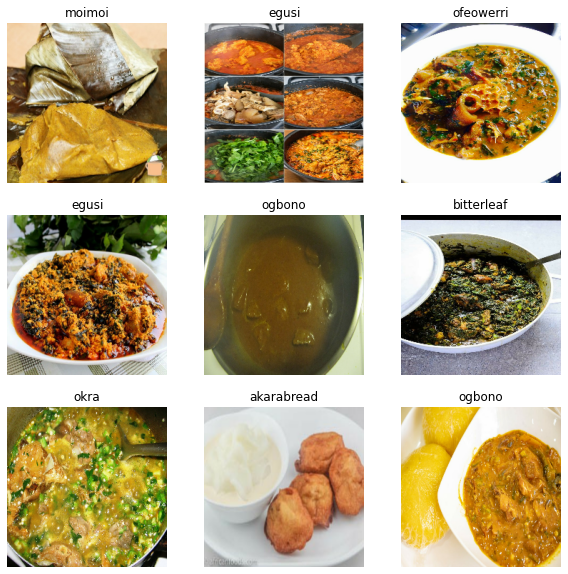

In [ ]:
ngclass_names = train_data.class_names

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(ngclass_names[labels[i].numpy()])
    plt.axis("off")

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE
train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=AUTOTUNE)

###Setting Up Data Argumentation


In [ ]:
###Setting Up Data Argumentation
from tensorflow.keras import Sequential

data_augmentation = Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
  layers.RandomZoom(0.2),
  # preprocessing.Rescaling(1/255.) # rescale inputs of images to between 0 & 1, required for models like ResNet50 but i am using EfficientNetX
], name="data_augmentation")

###Setting Up Baseline Model For Feature Extraction

In [ ]:
# Setup the base model and freeze its layers (this will extract features)
base_model = tf.keras.applications.EfficientNetV2B3(include_top=False)
base_model.trainable = False

# Setup model architecture with trainable top layers
inputs = layers.Input(shape=(224, 224, 3), name="input_layer")
x = data_augmentation(inputs) # augment images (only happens during training phase)
x = base_model(x, training=False) # put the base model in inference mode so weights which need to stay frozen, stay frozen
x = layers.GlobalAveragePooling2D(name="global_avg_pool_layer")(x)
outputs = layers.Dense(14, activation="softmax", name="output_layer")(x)
model = tf.keras.Model(inputs, outputs)

52617216/52606240 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetv2-b3 (Function  (None, None, None, 1536)  12930622 
 al)                                                             
                                                                 
 global_avg_pool_layer (Glob  (None, 1536)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 14)                21518     
                                                             

In [ ]:
# Compile
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit
history_model = model.fit(train_data,epochs=3, # fit for 3 epochs to keep experiments quick
                                           validation_data=test_data,
                                           validation_steps=int(len(test_data)), # validate on only 15% of test data during training
                                           callbacks=[create_tensorboard_callback(dir_name = 'TensorBoard', experiment_name ='model_1b3'),
                                                      create_model_checkpoint('Checkpoint')])

Saving TensorBoard log files to: TensorBoard/model_1b3/20220708-110828
Epoch 1/3
92/92 [==============================] - ETA: 0s - loss: 1.6467 - accuracy: 0.5102
Epoch 1: saving model to Checkpoint/20220708-110828.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220708-110828.ckpt/assets
92/92 [==============================] - 142s 1s/step - loss: 1.6467 - accuracy: 0.5102 - val_loss: 1.0596 - val_accuracy: 0.7157
Epoch 2/3
92/92 [==============================] - ETA: 0s - loss: 1.0373 - accuracy: 0.7087
Epoch 2: saving model to Checkpoint/20220708-110828.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220708-110828.ckpt/assets
92/92 [==============================] - 106s 1s/step - loss: 1.0373 - accuracy: 0.7087 - val_loss: 0.8297 - val_accuracy: 0.7544
Epoch 3/3
92/92 [==============================] - ETA: 0s - loss: 0.8587 - accuracy: 0.7500
Epoch 3: saving model to Checkpoint/20220708-110828.ckpt
INFO:tensorflow:Assets written to: Checkpoint/20220708-110828.ckpt/asse

In [ ]:
###Evaluate The Model
model_results = model.evaluate(test_data)

17/17 [==============================] - 2s 87ms/step - loss: 0.7319 - accuracy: 0.7698


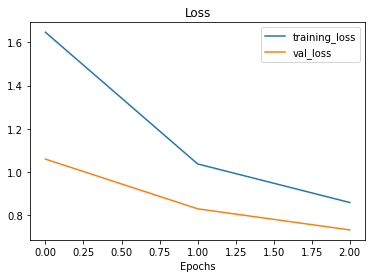

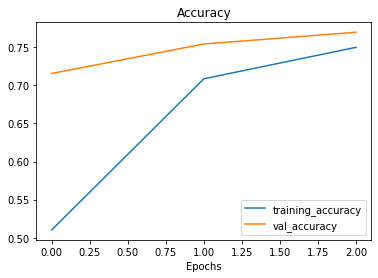

In [ ]:
plot_loss_curves(history_model)

In [ ]:
model.save('nig_food_ai77')


INFO:tensorflow:Assets written to: nig_food_ai77/assets


In [ ]:
# Unfreeze all of the layers in the base model
base_model.trainable = True

# Refreeze every layer except for the last 5
for layer in base_model.layers[:-10]:
  layer.trainable = False


In [ ]:
# Recompile model with lower learning rate
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), # 10x lower learning rate than default
              metrics=['accuracy'])

In [ ]:
for layer in model.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b3 True
global_avg_pool_layer True
output_layer True


In [ ]:
# Check which layers are trainable
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_1 False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block1b_project_conv False
10 block1b_project_bn False
11 block1b_project_activation False
12 block1b_add False
13 block2a_expand_conv False
14 block2a_expand_bn False
15 block2a_expand_activation False
16 block2a_project_conv False
17 block2a_project_bn False
18 block2b_expand_conv False
19 block2b_expand_bn False
20 block2b_expand_activation False
21 block2b_project_conv False
22 block2b_project_bn False
23 block2b_add False
24 block2c_expand_conv False
25 block2c_expand_bn False
26 block2c_expand_activation False
27 block2c_project_conv False
28 block2c_project_bn False
29 block2c_add False
30 block3a_expand_conv False
31 block3a_expand_bn False
32 block3a_expand_activation False
33 block3a_project_conv False
34 block3a_project_bn False
35 block3b_expand_conv False
36 block3b_exp

In [ ]:
# Fine-tune for 5 more epochs
fine_tune_epochs = 10 # model has already done 5 epochs, this is the total number of epochs we're after (5+5=10)

history_2_model = model.fit(train_data, epochs=fine_tune_epochs,
                                                     validation_data=test_data,
                                                     validation_steps=int(len(test_data)), # validate on 15% of the test data
                                                     initial_epoch=history_model.epoch[-1]) # start from previous last epoch

Epoch 3/10
92/92 [==============================] - 46s 379ms/step - loss: 0.7062 - accuracy: 0.7715 - val_loss: 0.6221 - val_accuracy: 0.8143
Epoch 4/10
92/92 [==============================] - 31s 336ms/step - loss: 0.6143 - accuracy: 0.7977 - val_loss: 0.5886 - val_accuracy: 0.8143
Epoch 5/10
92/92 [==============================] - 31s 340ms/step - loss: 0.5588 - accuracy: 0.8196 - val_loss: 0.5635 - val_accuracy: 0.8240
Epoch 6/10
92/92 [==============================] - 26s 282ms/step - loss: 0.5122 - accuracy: 0.8302 - val_loss: 0.5648 - val_accuracy: 0.8124
Epoch 7/10
92/92 [==============================] - 28s 299ms/step - loss: 0.4734 - accuracy: 0.8492 - val_loss: 0.5461 - val_accuracy: 0.8124
Epoch 8/10
92/92 [==============================] - 24s 258ms/step - loss: 0.4521 - accuracy: 0.8520 - val_loss: 0.5415 - val_accuracy: 0.8201
Epoch 9/10
92/92 [==============================] - 23s 246ms/step - loss: 0.4210 - accuracy: 0.8656 - val_loss: 0.5073 - val_accuracy: 0.8317

In [ ]:
model_tuned_results = model.evaluate(test_data)

17/17 [==============================] - 2s 88ms/step - loss: 0.5177 - accuracy: 0.8317


In [ ]:
##Exporting Models -v2
import tempfile

MODEL_DIR = tempfile.gettempdir()
version = 2
export_path = os.path.join(MODEL_DIR, str(version))
print('export_path = {}\n'.format(export_path))

tf.keras.models.save_model(
    model,
    export_path,
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
)

print('\nSaved model:')
!ls -l {export_path}

export_path = /tmp/2

INFO:tensorflow:Assets written to: /tmp/2/assets

Saved model:
total 10292
drwxr-xr-x 2 root root    4096 Jul  8 13:11 assets
-rw-r--r-- 1 root root 1264566 Jul  8 13:11 keras_metadata.pb
-rw-r--r-- 1 root root 9264110 Jul  8 13:11 saved_model.pb
drwxr-xr-x 2 root root    4096 Jul  8 13:11 variables


In [ ]:
###Download Model For Serving


### Make Predictions

In [ ]:
pred_probs = model.predict(test_data, verbose=1)

17/17 [==============================] - 3s 89ms/step


In [ ]:
pred_probs.shape

(517, 14)

In [ ]:
first_image_pred = pred_probs[0]

In [ ]:
tf.argmax(first_image_pred)

<tf.Tensor: shape=(), dtype=int64, numpy=11>

In [ ]:
#Train Data Classes: Total is 14

for i in enumerate(ngclass_names):
  print(i)

(0, 'akarabread')
(1, 'banga')
(2, 'bitterleaf')
(3, 'edikakong')
(4, 'egusi')
(5, 'ewedu')
(6, 'garriandgrounut')
(7, 'jellof')
(8, 'moimoi')
(9, 'nkwobi')
(10, 'ofeowerri')
(11, 'ogbono')
(12, 'okra')
(13, 'pufpuf')


In [ ]:
pred_classes = pred_probs.argmax(axis=1)

In [ ]:
pred_classes[:10]

array([11,  0, 13,  4, 11,  7, 12,  4,  7, 12])

In [ ]:
# Load File For Predicton
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving okraaas.jpg to okraaas.jpg
User uploaded file "okraaas.jpg" with length 50168 bytes


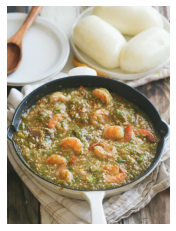

In [ ]:
import matplotlib.pyplot as plt
view_image = plt.imread(fn)
plt.imshow(view_image)
plt.axis(False);

In [ ]:
imgp = load_and_prep_image(fn, scale=True)

In [ ]:
# Load the image and make predictions
img = load_and_prep_image(fn, scale=False) # don't scale images for EfficientNet predictions
pred_prob = model.predict(tf.expand_dims(img, axis=0)) # model accepts tensors of shape [None, 224, 224, 3]
pred_class = ngclass_names[pred_prob.argmax()] # find the predicted class
print(f'Image Uploaded is: {pred_class} with {pred_prob.max():.2f} % Accuracy') 


Image Uploaded is: okra with 0.97 % Accuracy


In [ ]:
test = tf.expand_dims(imgp, axis =0)

In [ ]:
### Turning Tensors to Numpy so they work as numpy arrays lists
import numpy
test = test.numpy()
test

array([[[[0.26666668, 0.29411766, 0.31764707],
         [0.26666668, 0.29411766, 0.31764707],
         [0.26666668, 0.29411766, 0.31764707],
         ...,
         [0.84705883, 0.84705883, 0.84705883],
         [0.84705883, 0.84705883, 0.84705883],
         [0.85490197, 0.85490197, 0.85490197]],

        [[0.26666668, 0.29411766, 0.31764707],
         [0.26666668, 0.29411766, 0.31764707],
         [0.26666668, 0.29411766, 0.31764707],
         ...,
         [0.84705883, 0.84705883, 0.84705883],
         [0.84705883, 0.84705883, 0.84705883],
         [0.85490197, 0.85490197, 0.85490197]],

        [[0.25882354, 0.28627452, 0.30980393],
         [0.25882354, 0.28627452, 0.30980393],
         [0.25882354, 0.28627452, 0.30980393],
         ...,
         [0.85490197, 0.85490197, 0.85490197],
         [0.85490197, 0.85490197, 0.85490197],
         [0.85490197, 0.85490197, 0.85490197]],

        ...,

        [[0.2895727 , 0.27780798, 0.21898443],
         [0.13416815, 0.10337334, 0.03542728]

In [ ]:
data = json.dumps({"signature_name":"serving_default", "instances": test.tolist()})

In [ ]:
data

In [ ]:
#When ran on the Postman Gave the Follow.

In [ ]:
response = {
    "predictions": [[0.0320383608, 0.122396268, 0.0609078966, 0.0891962126, 0.0684004799, 0.0997962356, 0.138783932, 0.0871980637, 0.0805166513, 0.0602424, 0.0458353944, 0.0491847731, 0.0313608348, 0.0341426097]
    ]
}

In [1]:
import tensorflow as tf


In [3]:
model_depl = tf.keras.models.load_model('/content/drive/MyDrive/Models/Nigeria FoodAI/2')

In [4]:
model_depl.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, None, None, 3)    0         
 al)                                                             
                                                                 
 efficientnetv2-b3 (Function  (None, None, None, 1536)  12930622 
 al)                                                             
                                                                 
 global_avg_pool_layer (Glob  (None, 1536)             0         
 alAveragePooling2D)                                             
                                                                 
 output_layer (Dense)        (None, 14)                21518     
                                                             

In [5]:
import requests

# Labels
response = requests.get("https://raw.githubusercontent.com/elinteerie/Nigeria-Food-AI/main/labels.txt")
labels = response.text.split("\n")

def classify_image(inp):
  inp = inp.reshape((-1, 224, 224, 3))
  prediction = model_depl.predict(inp).flatten()
  confidences = {labels[i]: float(prediction[i]) for i in range(14)}
  return confidences


In [6]:
!pip install gradio
import gradio as gr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.6 MB 6.9 MB/s 
     |████████████████████████████████| 141 kB 68.9 MB/s 
     |████████████████████████████████| 2.3 MB 49.4 MB/s 
     |████████████████████████████████| 84 kB 3.4 MB/s 
     |████████████████████████████████| 84 kB 4.2 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 54 kB 3.4 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 212 kB 66.6 MB/s 
     |████████████████████████████████| 272 kB 63.4 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 80 kB 11.2 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 43 kB 2.7 MB/s 
     |████████████████████████████████| 4.1 MB 57.7 MB/s 
     |████████████████████████████████| 62 kB 1.3

In [7]:
import gradio as gr

gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs=gr.Label(num_top_classes=3),
             examples=["/content/egusi sample.jpg", "/content/Ogbono soup.jpg"]).launch(share=True)

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://52031.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f76027bb610>,
 'http://127.0.0.1:7860/',
 'https://52031.gradio.app')